# Analisis Uang yang Beredar di Indonesia

### Disusun oleh: Dwi Ardian Syah

Project ini bertujuan untuk menganalisis uang yang beredar di Indonesia dalam periode 2010-2019.
Pertanyaan yang akan dijawab melalui analisis ini adalah:
1. Komponen apakah yang paling berpengaruh terhadap uang yang beredar?
2. Bagaimana model yang dapat terbentuk dari analisis tersebut? 
3. Berapa banyak kluster yang tepat untuk mengelompokkan data tersebut?

Sumber data dari https://www.bi.go.id/seki/tabel/TABEL1_1.xls

## Analisis Data Uang yang Beredar di Indonesia

Uang beredar adalah kewajiban sistem moneter (Bank Sentral, Bank Umum, dan Bank Perkreditan Rakyat/BPR) terhadap sektor swasta domestik (tidak termasuk pemerintah pusat dan bukan penduduk). Kewajiban yang menjadi komponen Uang Beredar terdiri dari uang kartal yang dipegang masyarakat (di luar Bank Umum dan BPR), uang giral, uang kuasi yang dimiliki oleh sektor swasta domestik, dan surat berharga selain saham yang diterbitkan oleh sistem moneter yang dimiliki sektor swasta domestik dengan sisa jangka waktu sampai dengan satu tahun. 

Kewajiban yang menjadi komponen Uang Beredar terdiri dari uang kartal yang dipegang masyarakat (di luar Bank Umum dan BPR), uang giral, uang kuasi yang dimiliki oleh sektor swasta domestik, dan surat berharga selain saham yang diterbitkan oleh sistem moneter yang dimiliki sektor swasta domestik dengan sisa jangka waktu sampai dengan satu tahun. 

Pada data ini, akan diberikan data tentang komponen Uang Beredar dan akan diuji komponen apakah yang paling berpengaruh pada uang beredar di Indonesia dalam periode 2010-2019. Variabel dependen (y) dari data ini adalah Uang Beredar Luas sedangkan variabel independen (x) dari data ini adalah Uang Kartal nonbank, Simpanan Giro Rupiah, Simpanan Berjangka, Tabungan, Simpanan Giro Valuta Asing, dan Surat Berharga selain Saham.

### Input Data ke Python

Awalnya, data yang tersedia hanyalah dalam bentuk format file xls yang masih belum sesuai dengan format untuk digunakan pada python.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
with pd.ExcelFile('https://databucketdts.s3.amazonaws.com/TABEL1_1.xls') as xls:
    df = pd.read_excel(xls)   
df.head()

,I.1 Uang Beredar dan faktor-faktor yang mempengaruhinya,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 54,Unnamed: 55,Unnamed: 56,Unnamed: 57,Unnamed: 58,Unnamed: 59,Unnamed: 60,Unnamed: 61,Unnamed: 62,Unnamed: 63
0,Money Supply and its Determinations,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Dari tampilan data tersebut, maka perlu dilakukan penyesuaian terhadap data yang dipilih dengan cara mengubah beberapa kolom dan baris sehingga data dapat diolah seperti di bawah ini.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
with pd.ExcelFile('https://databucketdts.s3.amazonaws.com/uangberedar.xls') as xls:
    df = pd.read_excel(xls)
    
df.head()

,Keterangan,Uang_Beredar_Luas,Uang_Kartal_nonbank,Simpanan_Giro_rupiah,Simpanan_Berjangka,Tabungan,Simpanan_Giro_Valuta_asing,Surat_Berharga_Selain_Saham
0,Januari_2010,2073859.77,211810.90,284715.94,866010.13,580462.38,123586.54,7273.88
1,Februari_2010,2066480.99,211708.21,278375.58,873909.07,572279.67,122443.34,7765.12
2,Maret_2010,2112082.70,205083.05,289377.79,903846.38,574375.95,133150.79,6248.75
3,April_2010,2116023.54,211390.29,283327.40,907623.00,579116.20,128463.51,6103.13
4,Mei_2010,2143234.05,214694.87,299310.16,912901.31,584776.18,125303.87,6247.65


Data tersebut terhitung dalam miliar (Rp), mulai dari Januari 2010 hingga Juni 2019.

Sebelum dilakukan pengujian, terlebih data dicek apakah ada nilai null dalam data tersebut. 

In [3]:
print("----- Data Information -----\n")
df.info()

----- Data Information -----

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114 entries, 0 to 113
Data columns (total 8 columns):
Keterangan                     114 non-null object
Uang_Beredar_Luas              114 non-null float64
Uang_Kartal_nonbank            114 non-null float64
Simpanan_Giro_rupiah           114 non-null float64
Simpanan_Berjangka             114 non-null float64
Tabungan                       114 non-null float64
Simpanan_Giro_Valuta_asing     114 non-null float64
Surat_Berharga_Selain_Saham    114 non-null float64
dtypes: float64(7), object(1)
memory usage: 7.2+ KB


Dari hasil summary tersebut, terbukti bahwa tidak ada nilai null dalam data tersebut.

## Uji Scatter Plot

Setelah didapatkan data Uang Beredar, maka akan diuji satu per satu komponen dengan menggunakan scatter plot. Berikut hasil yang ditampilkan dari uji scatter plot.

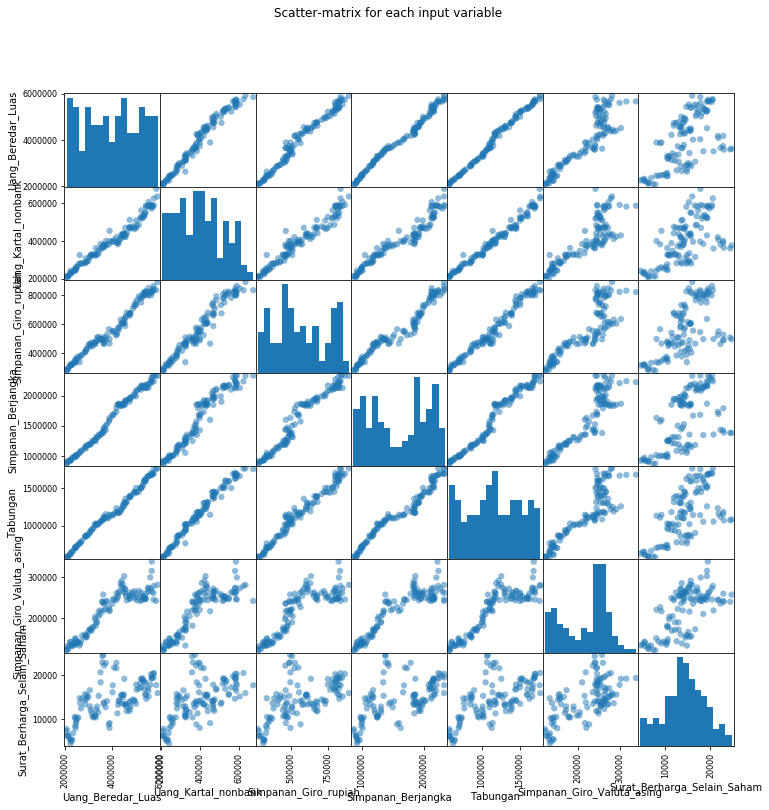

In [4]:
import pandas as pd
from matplotlib import cm
feature_names = ['Uang_Beredar_Luas', 'Uang_Kartal_nonbank', 'Simpanan_Giro_rupiah', 'Simpanan_Berjangka','Tabungan','Simpanan_Giro_Valuta_asing','Surat_Berharga_Selain_Saham']
X = df[feature_names]
cmap = cm.get_cmap('gnuplot')
scatter = pd.plotting.scatter_matrix(X, marker = 'bo', s=40, hist_kwds={'bins':15}, figsize=(12,12), cmap = cmap)
plt.suptitle('Scatter-matrix for each input variable')
plt.savefig('df_scatter_matrix')

Pada scatter plot ini, banyak hasil plot yang menunjukkan bahwa plot berpola regresi linear. Sehingga dipilih beberapa features yang dianggap baik untuk menggunakan model regresi linear.

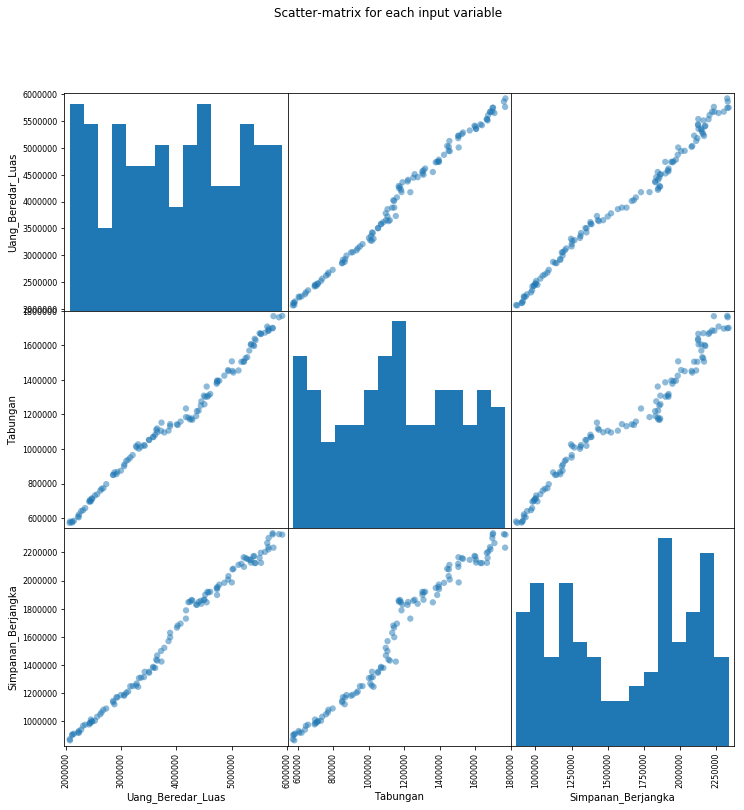

In [5]:
import pandas as pd
from matplotlib import cm
feature_names = ['Uang_Beredar_Luas', 'Tabungan', 'Simpanan_Berjangka']
X = df[feature_names]
cmap = cm.get_cmap('gnuplot')
scatter = pd.plotting.scatter_matrix(X, marker = 'bo', s=40, hist_kwds={'bins':15}, figsize=(12,12), cmap = cmap)
plt.suptitle('Scatter-matrix for each input variable')
plt.savefig('df_scatter_matrix')

Pada scatter plot ini, Uang Beredar Luas dengan Tabungan menghasilkan plot yang lebih baik ketimbang features lain karena polanya membentuk garis linear.

## Memilih features yang memiliki dugaan kuat ada korelasi

Setelah seluruh features ditampilkan, untuk memilih features yang memiliki dugaan kuat adanya korelasi antar features maka akan dilakukan uji korelasi seperti berikut.

In [6]:
df.corr()

,Uang_Beredar_Luas,Uang_Kartal_nonbank,Simpanan_Giro_rupiah,Simpanan_Berjangka,Tabungan,Simpanan_Giro_Valuta_asing,Surat_Berharga_Selain_Saham
Uang_Beredar_Luas,1.000000,0.983238,0.987170,0.993887,0.995236,0.900293,0.628761
Uang_Kartal_nonbank,0.983238,1.000000,0.972309,0.963911,0.988939,0.854110,0.623805
Simpanan_Giro_rupiah,0.987170,0.972309,1.000000,0.974047,0.985010,0.848333,0.602725
Simpanan_Berjangka,0.993887,0.963911,0.974047,1.000000,0.979746,0.904512,0.601184
Tabungan,0.995236,0.988939,0.985010,0.979746,1.000000,0.883423,0.642302
Simpanan_Giro_Valuta_asing,0.900293,0.854110,0.848333,0.904512,0.883423,1.000000,0.659683
Surat_Berharga_Selain_Saham,0.628761,0.623805,0.602725,0.601184,0.642302,0.659683,1.000000


Berdasarkan hasil perhitungan uji korelasi, maka didapatkan Uang Beredar Luas dengan Tabungan memiliki hasil korelasi yang lebih tinggi ketimbang features lain.

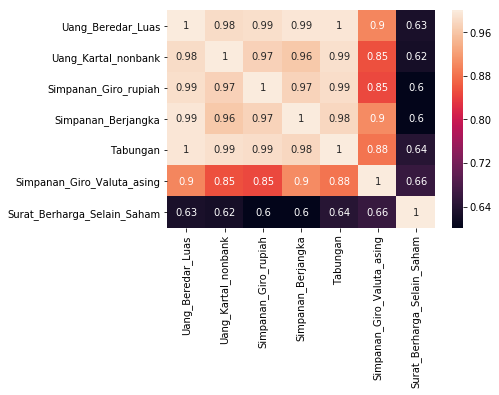

In [7]:
import seaborn as sns
sns.heatmap(df.corr(), annot=True)

Berdasarkan hasil uji korelasi, didapatkan Uang Beredar Luas dengan Tabungan memiliki nilai korelasi yang lebih tinggi dibandingkan features lain. Ini menunjukkan bahwa Tabungan memiliki pengaruh pada Uang Beredar Luas di Indonesia.

## Statistik deskriptif

Karena telah dipilih 2 features, maka akan dilakukan uji statistika deskriptif sebagai berikut.

In [8]:
data = df[['Tabungan','Uang_Beredar_Luas']]
data.describe()

,Tabungan,Uang_Beredar_Luas
count,1.140000e+02,1.140000e+02
mean,1.164199e+06,3.977187e+06
std,3.472878e+05,1.149276e+06
min,5.722797e+05,2.066481e+06
25%,8.810849e+05,3.009052e+06
50%,1.148522e+06,4.017318e+06
75%,1.451710e+06,4.989463e+06
max,1.771154e+06,5.918515e+06


Berdasarkan hasil data secara deskriptif dengan total data sebanyak 114, rata-rata dari tabungan adalah Rp 116,4199 triliun dan rata-rata uang beredar luas adalah Rp 397,7187 triliun. Standar deviasi dari tabungan adalah Rp 34,7287 triliun dan standar deviasi uang beredar luas adalah Rp 114,9276 triliun. Nilai minimal dari tabungan adalah Rp 57,2279 triliun dan nilai minimal dari uang beredar luas adalah Rp 206,6481 triliun. Nilai maksimal dari tabungan adalah Rp 177,1154 triliun dan nilai maksimal dari uang beredar luas adalah Rp 591,8515 triliun. Kuartil 1 tabungan sebesar Rp 88,1084 triliun dan uang beredar luas sebesar Rp 300,9052 triliun. Kuartil 2 tabungan sebesar Rp 114,8522 triliun dan uang beredar luas sebesar Rp 401,7318 triliun. Kuartil 3 tabungan sebesar Rp 145,171 triliun dan Rp 498,9463 triliun.

## Analisis model regresi

Setelah dijelaskan secara deskriptif, akan dicari model datanya sebagai berikut. Sebelumnya data akan dinormalkan terlebih dahulu agar tidak menimbulkan nilai sisaan MAE/MSE yang bernilai tinggi. 

In [9]:
x_data, y_data = (df["Tabungan"].values, df["Uang_Beredar_Luas"].values)

xdata =x_data/max(x_data)
ydata =y_data/max(y_data)

Lalu data diuji dengan perbandingan sebanyak 80% data pada train dan 20% data pada test.

In [12]:
msk = np.random.rand(len(data)) < 0.8
train = data[msk]
test = data[~msk]

----- Output Regresi tanpa Normalisasi Data -----

Coefficients:  [[3.28559373]]
Intercept:  [152235.24493057]
Mean absolute error: 109478.54
Residual sum of squares (MSE): 16347348448.48
R2-score: 0.98


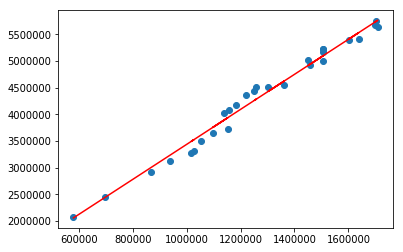

In [13]:
print("----- Output Regresi tanpa Normalisasi Data -----\n")

from sklearn import linear_model
from sklearn.metrics import r2_score

regr = linear_model.LinearRegression()
x_train = np.asanyarray(train[['Tabungan']])
y_train = np.asanyarray(train[['Uang_Beredar_Luas']])
regr.fit (x_train, y_train)

x_train = np.asanyarray(test[['Tabungan']])
y_train = np.asanyarray(test[['Uang_Beredar_Luas']])
y_train_ = regr.predict(x_train)

# The coefficients
print ('Coefficients: ', regr.coef_)
print ('Intercept: ',regr.intercept_)
print("Mean absolute error: %.2f" % np.mean(np.absolute(y_train_ - y_train)))
print("Residual sum of squares (MSE): %.2f" % np.mean((y_train_ - y_train) ** 2))
print("R2-score: %.2f" % r2_score(y_train_ , y_train) )

plt.scatter(x_train,y_train)
plt.plot(x_train,y_train_, c = 'r')
plt.show()

Karena data berpotensi menghasilkan nilai MAE dan MSE yang besar, maka data perlu dinormalisasi sebagai berikut.

In [14]:
msk = np.random.rand(len(data)) < 0.8
x_train = xdata[msk]
x_test = xdata[~msk]
y_train = ydata[msk]
y_test = ydata[~msk]

In [15]:
def databaru(data):
    data_baru = []
    for i in data:
        x = []
        x.append(i)
        data_baru.append(x)
    return data_baru

x_train1 = databaru(x_train)
x_test1 = databaru(x_test)
y_train1 = databaru(y_train)
y_test1 = databaru(y_test)

----- Output Regresi dengan Normalisasi Data -----

Coefficients:  [[0.9811339]]
Intercept:  [0.02679411]
Mean absolute error: 0.01
Residual sum of squares (MSE): 0.00
R2-score: 0.99


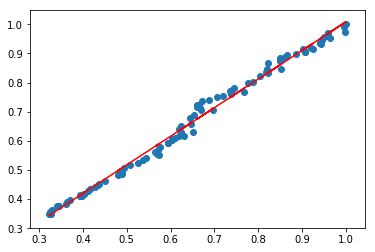

In [16]:
print("----- Output Regresi dengan Normalisasi Data -----\n")

from sklearn import linear_model
from sklearn.metrics import r2_score

regr = linear_model.LinearRegression()
#x_train = np.asanyarray(train[['Tabungan']])
#y_train = np.asanyarray(train[['Uang_Beredar_Luas']])
regr.fit (x_train1, y_train1)

#x_train = np.asanyarray(test[['Tabungan']])
#y_train = np.asanyarray(test[['Uang_Beredar_Luas']])
y_train_1 = regr.predict(x_train1)

# The coefficients
print ('Coefficients: ', regr.coef_)
print ('Intercept: ',regr.intercept_)
print("Mean absolute error: %.2f" % np.mean(np.absolute(y_train_1 - y_train1)))
print("Residual sum of squares (MSE): %.2f" % np.mean((y_train_1 - y_train1) ** 2))
print("R2-score: %.2f" % r2_score(y_train_1 , y_train1) )

plt.scatter(x_train1,y_train1)
plt.plot(x_train1,y_train_1, c = 'r')
plt.show()

Variable independen (x) pada data ini adalah tabungan, sedangkan variable dependen (y) pada data ini adalah uang beredar luas.

Dari hasil perhitungan untuk model regresi linear, didapatkan nilai koefisien sebesar 3.28559373 dan intercept sebesar 152235.24493057. Berdasarkan hasil koefisien dan intercept, model regresi linear yang dapat dibentuk adalah sebagai berikut.

y = 152.235,24493057 + 3,28559373 x

Artinya setiap kenaikan senilai satu tabungan mengakibatkan bertambahnya nilai uang beredar luas senilai Rp 152,238 triliun.

Berdasarkan hasil R2, telah terbukti bahwa model yang digunakan adalah model yang baik digunakan dan memiliki korelasi yang kuat antar variabel.

## Uji klaster

Setelah ditemukan model regresinya, maka akan dicari banyaknya kluster yang cocok digunakan pada data ini.
Akan diuji banyaknya kluster pada features Uang Beredar luas dengan Tabungan.

In [ ]:
import random 
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn.cluster import KMeans 
from sklearn.datasets.samples_generator import make_blobs 
%matplotlib inline

In [ ]:
dataKluster = df[['Uang_Beredar_Luas', 'Uang_Kartal_nonbank','Simpanan_Giro_rupiah','Simpanan_Berjangka','Tabungan','Simpanan_Giro_Valuta_asing','Surat_Berharga_Selain_Saham']]

Berikut hasil nilai dataset pada setiap variabel yang dibentuk dalam array

In [ ]:
from sklearn.preprocessing import StandardScaler
X = dataKluster.values[:,1:]
X = np.nan_to_num(X)
Clus_km = StandardScaler().fit_transform(X)
Clus_km

Metode yang digunakan untuk klastering adalah metode K-Means, lalu data dipanggil sesuai dengan urutannya.

In [ ]:
clusterNum = 2
k_means = KMeans(init = "k-means++", n_clusters = clusterNum, n_init = 12)
k_means.fit(X)
labels = k_means.labels_
print(labels)

Pemanggilan data, klaster sesuai dengan nama label

In [ ]:
dataKluster["Clus_km"] = labels
dataKluster.head

Berikut hasil data yang sudah dibuat 2 kluster.

In [ ]:
KMeansClusterCenter = dataKluster.groupby('Clus_km').mean()
KMeansClusterCenter

Output dari perhitungan serta plot yang dibentuk dari K-Means

In [ ]:
plt.scatter(dataKluster['Tabungan'], dataKluster['Uang_Beredar_Luas'])
plt.scatter(KMeansClusterCenter['Tabungan'], KMeansClusterCenter['Uang_Beredar_Luas'], marker = 'x', c = 'r')
# Calculate silhouette_score
from sklearn.metrics import silhouette_score

print(silhouette_score(X, k_means.labels_))
plt.show()

Jadi, hasil perhitungan dari pengujian 2 klaster antara  uang kartal nonbank dengan uang beredar luas adalah 0.6446414930722649 yang merupakan nilai terbaik dari pengujian banyaknya klaster. Adapun output secara visual menunjukkan bahwa data saling mendekati titik utama klaster. 

In [ ]:
# Import the KElbowVisualizer method 
from yellowbrick.cluster import KElbowVisualizer

# Instantiate a scikit-learn K-Means model
model = KMeans(random_state=0)
# Instantiate the KElbowVisualizer with the number of clusters and the metric 
visualizer = KElbowVisualizer(model, k=(2,6), metric='silhouette', timings=False)
# Fit the data and visualize
visualizer.fit(X)    
visualizer.poof()   

Dari hasil output visual, terlihat bahwa klaster sebanyak 2 memiliki nilai tertinggi dibandingkan klaster lebih dari 2.
Maka terbukti bahwa data ini lebih baik menggunakan 2 klaster saja.